<a href="https://colab.research.google.com/github/ismaillinda262-web/telco-churn-analysis/blob/main/FINAL_Project_of_Telco_Churn_Linda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_csv('Telco-Customer-Churn.csv')


**Understanding the Dataset**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()
#We notice that we need to change the data type for some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Summary statistics for numeric columns
df.describe()
#Here we notice that the tenure min is 0, but the contract is at least month-to-month, so we want to check it

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data Cleaning

In [ ]:
# Convert 'Churn' to 0/1 values To standardize the  dataset on one pattern
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert to category type
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService',
'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']

df[categorical_columns] = df[categorical_columns].astype('category')


In [ ]:
df['Churn'] = df['Churn'].astype('category')

In [ ]:
# Check the data types of each column again
print(df.dtypes)

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [ ]:
# Display rows where tenure is 0
zero_tenure = df[df['tenure'] == 0]

# Show the rows with tenure == 0 and only the relevant columns
print(zero_tenure[['tenure', 'TotalCharges', 'MonthlyCharges']])

#When the tenure ==0 , the monthly charges have a value while the total charges is null, not as expected ,which indicates that the data may be incorrect
#Since they are only 11 , we decided to drop them

      tenure  TotalCharges  MonthlyCharges
488        0           NaN           52.55
753        0           NaN           20.25
936        0           NaN           80.85
1082       0           NaN           25.75
1340       0           NaN           56.05
3331       0           NaN           19.85
3826       0           NaN           25.35
4380       0           NaN           20.00
5218       0           NaN           19.70
6670       0           NaN           73.35
6754       0           NaN           61.90


In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

#Check they are removed
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [ ]:
# Check for missing values
df.isnull().sum()

#We noticed there is no null values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Check for duplicate rows (considering all columns)
duplicates = df[df.duplicated()]

# Display duplicate rows
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [ ]:
# Double check by the custemer ID.
# Check for duplicates in the 'customerID' column
duplicates = df[df.duplicated(subset='customerID')]

# Display duplicate rows based on the 'customerID' column
if not duplicates.empty:
    print("Duplicate rows found based on the 'customerID' column:")
    print(duplicates)
else:
    print("No duplicates found in the 'customerID' column.")

No duplicates found in the 'customerID' column.


*EDA*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#Calculate statistics for MonthlyCharges
mean_monthly_charges = df['MonthlyCharges'].mean()
median_monthly_charges = df['MonthlyCharges'].median()
mode_monthly_charges = df['MonthlyCharges'].mode()[0]

# Calculate statistics for Tenure
mean_tenure = df['tenure'].mean()
median_tenure = df['tenure'].median()
mode_tenure = df['tenure'].mode()[0]

#tenure_stat = df['tenure'].agg(['mean', 'median', lambda x: x.mode()[0]]) another way


# Calculate statistics for TotalCharges
mean_total_charges = df['TotalCharges'].mean()
median_total_charges = df['TotalCharges'].median()
mode_total_charges = df['TotalCharges'].mode()[0]

# Create a summary table
summary_stats = {
    'Statistic': ['Mean', 'Median', 'Mode'],
    'MonthlyCharges': [mean_monthly_charges, median_monthly_charges, mode_monthly_charges],
    'tenure': [mean_tenure, median_tenure, mode_tenure],
    'TotalCharges': [mean_total_charges, median_total_charges, mode_total_charges]
}

# Convert to DataFrame for better visualization
summary_stats_df = pd.DataFrame(summary_stats)

# Display the summary statistics
summary_stats_df


,Statistic,MonthlyCharges,tenure,TotalCharges
0,Mean,64.798208,32.421786,2283.300441
1,Median,70.350000,29.000000,1397.475000
2,Mode,20.050000,1.000000,20.200000


In [ ]:
# Add 'TenureGroup' column with adjusted bins
def assign_tenure_group(tenure):
    if tenure <= 12:
        return '1-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 36:
        return '25-36 months'
    elif tenure <= 48:
        return '37-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '61-71 months'

df['TenureGroup'] = df['tenure'].apply(assign_tenure_group)

#Add 'AverageMonthlyCharges' column
df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']

# Add 'RevenueContribution' column
average_monthly_charge = df['MonthlyCharges'].mean()
df['RevenueContribution'] = df['MonthlyCharges'] / average_monthly_charge

# Set proper data types
df['TenureGroup'] = df['TenureGroup'].astype('category')
#df['AverageMonthlyCharges'] = df['AverageMonthlyCharges'].astype('float64')
df['RevenueContribution'] = df['RevenueContribution'].astype('float64')

print(df.head())


   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingMovies  \
0  No phone service             DSL             No  ...              No   
1                No             DSL            Yes  ...              No   
2                No             DSL            Yes  ...              No   
3  No phone service             DSL            Yes  ...              No   
4                No     Fiber optic             No  ...              No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharg

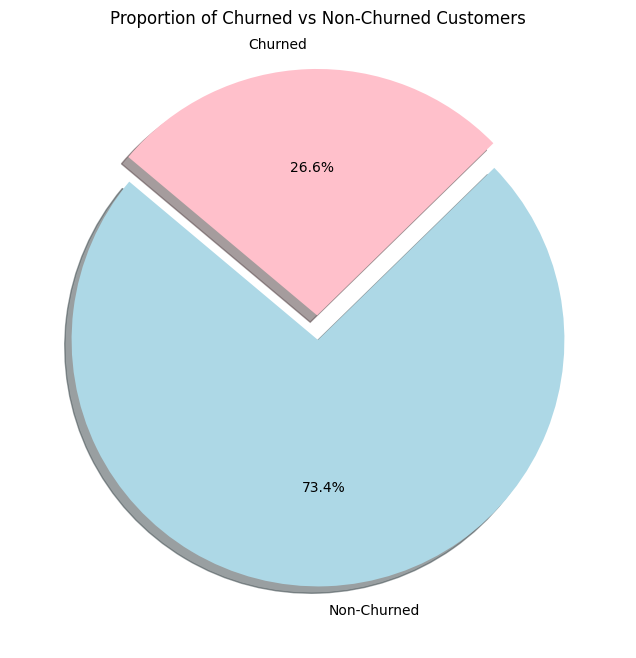

In [ ]:
# Plot pie chart (Proportion of Churned vs Non-Churned Customers)
churn_counts = df['Churn'].value_counts()
labels = ['Non-Churned', 'Churned']
colors = ['lightblue', 'pink']

plt.figure(figsize=(8, 8))
plt.pie(
    churn_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0, 0.1),  # Highlight the Churned segment
    shadow=True)
plt.title('Proportion of Churned vs Non-Churned Customers')
plt.ylabel('')
plt.show()

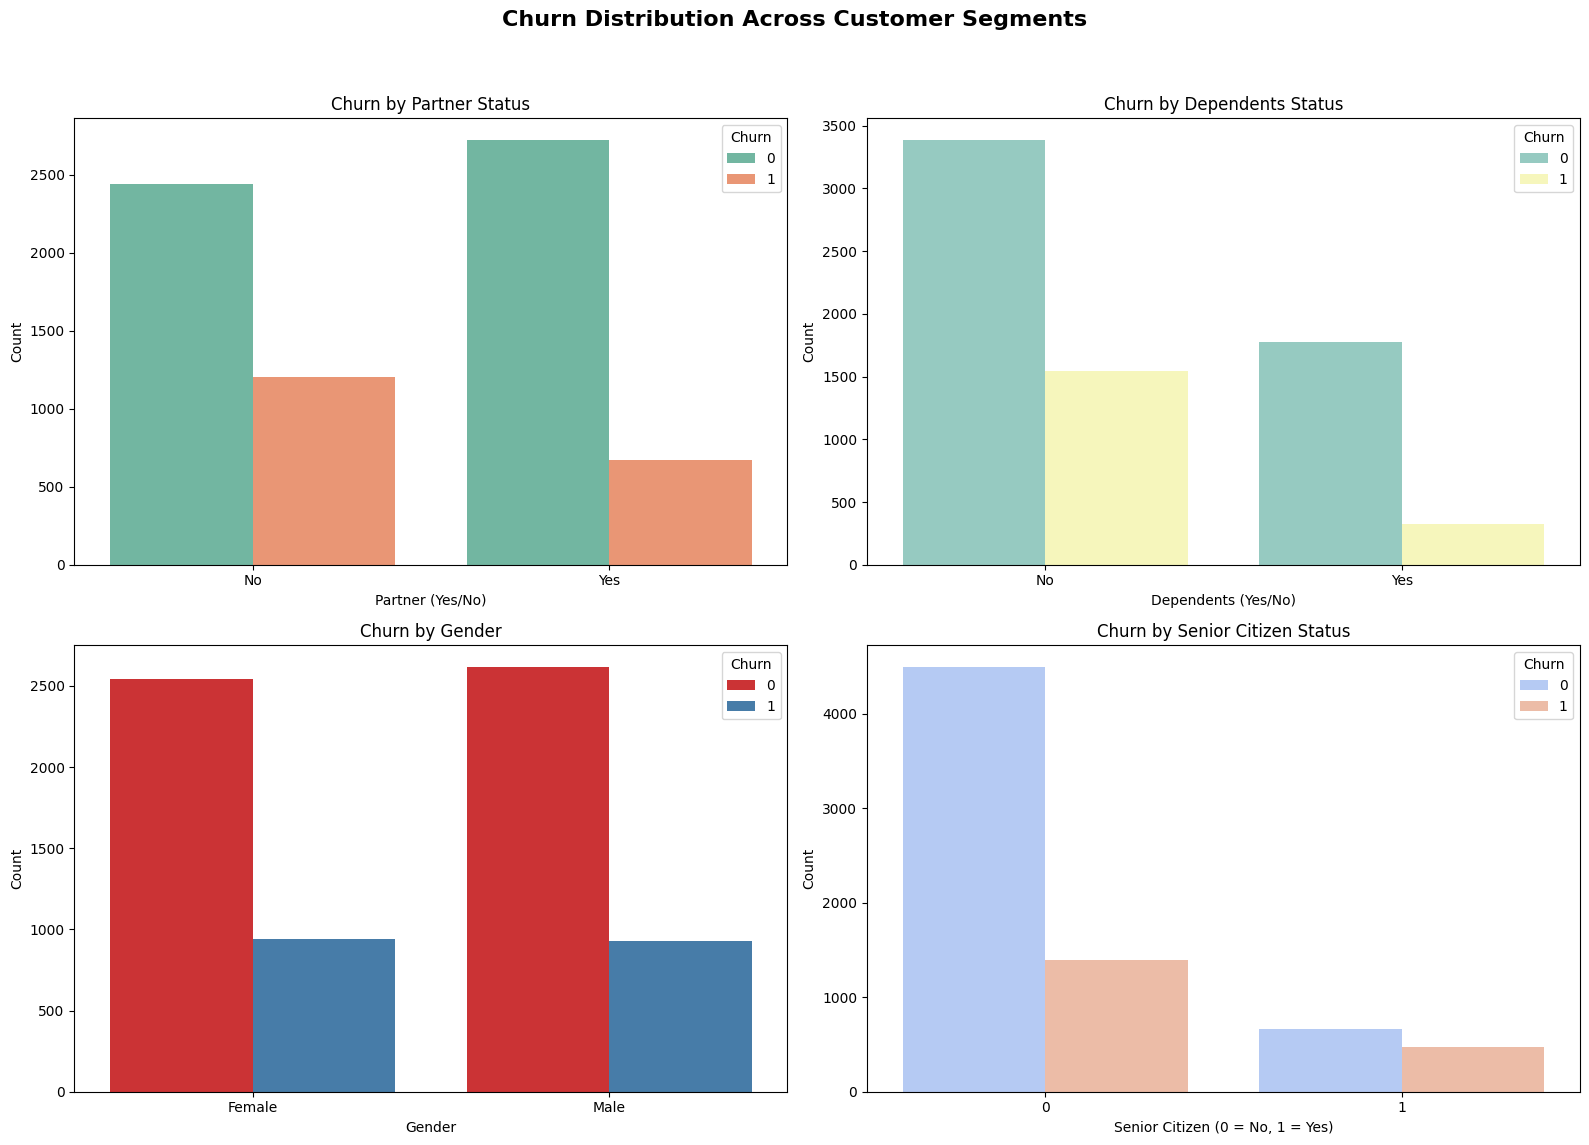

In [ ]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churn Distribution Across Customer Segments', fontsize=16, fontweight='bold')

# Plot 1: Churn by Partner
sns.countplot(data=df, x='Partner', hue='Churn', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Churn by Partner Status')
axes[0, 0].set_xlabel('Partner (Yes/No)')
axes[0, 0].set_ylabel('Count')

# Plot 2: Churn by Dependents
sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Dependents Status')
axes[0, 1].set_xlabel('Dependents (Yes/No)')
axes[0, 1].set_ylabel('Count')

# Plot 3: Churn by Gender
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Churn by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Plot 4: Churn by Senior Citizen
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Churn by Senior Citizen Status')
axes[1, 1].set_xlabel('Senior Citizen (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])#[left, bottom, right, top]
plt.show()

# Observations from the Visualizations:
1. Proportion of Churned vs. Non-Churned Customers (Pie Chart):
Approximately 26.6% of the customers have churned, while 73.4% have not.
This indicates that the majority of customers are retained, but a significant proportion (over a quarter) still churn.
2. Churn Distribution Across Customer Segments (Bar Charts):

**By Partner Status:**

Customers without a partner churn more frequently than those with a partner.
This suggests that customers with a partner might have more stable commitments or preferences.

**By Dependents Status:**

Customers without dependents churn significantly more than those with dependents.
Customers with dependents might have different service requirements, potentially making them more loyal.

**By Gender:**
The churn rates appear relatively balanced between male and female customers.
Gender does not seem to be a strong differentiator for churn behavior in this dataset.

**By Senior Citizen Status:**

Senior citizens (coded as 1) churn more frequently than non-senior citizens.
This may indicate challenges like service usability or affordability for older customers.

In [ ]:
df['Churn'] = df['Churn'].astype(int)
average_churn_rate = df.groupby('tenure',observed = 0)['Churn'].mean()#observed=True: Only observed (non-empty) categories are included in the results
gender_churn_rate = df.groupby('gender',observed = 0)['Churn'].mean()#observed=False: all categories are included in the results
payment_method_churn_rate = df.groupby('PaymentMethod',observed = 0)['Churn'].mean()
contract_type_churn_rate = df.groupby('Contract',observed = 0)['Churn'].mean()


**Different Customer Groups**

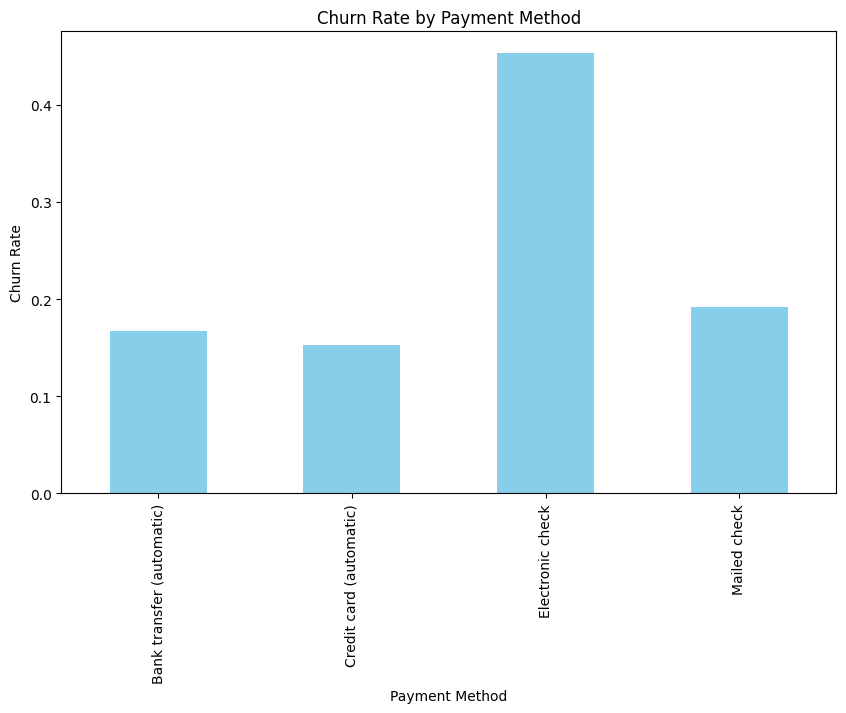

In [ ]:
# Bar plot for churn rate by payment method
plt.figure(figsize=(10, 6))
payment_method_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.show()
#Electronic check users have a significantly higher churn rate (45.2%) compared to the other payment methods.

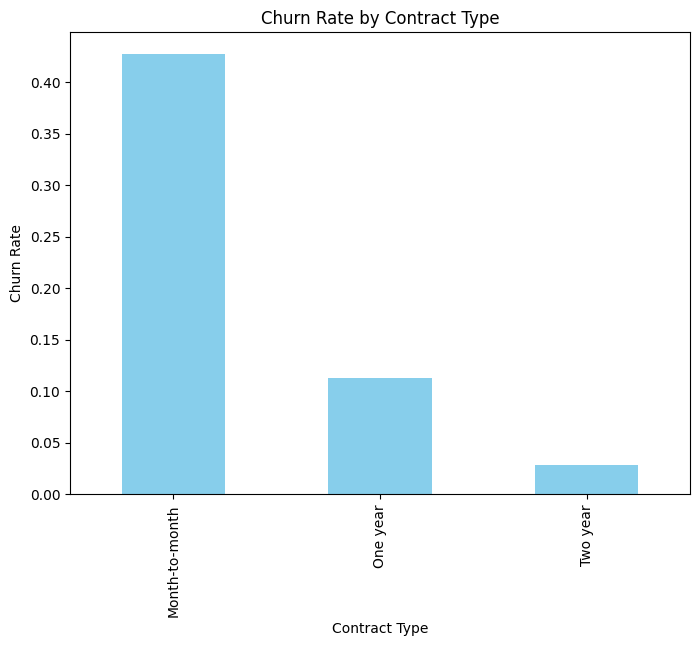

In [ ]:
# Bar plot for churn rate by contract type
plt.figure(figsize=(8, 6))
contract_type_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()
#Month-to-month customers have a very high churn rate (42.7%) compared to the other two contract types.

#  Observations :

# Electronic check users have a significantly higher churn rate (45.2%) compared to the other payment methods.
# Both genders have relatively similar churn rates (around 26-27%).
# Month-to-month customers have a very high churn rate (42.7%) compared to the other two contract types.

In [ ]:
# Calculate the correlation between MonthlyCharges, Tenure, Churn,and RevenueContribution.
correlation_matrix = df[['MonthlyCharges', 'tenure', 'Churn', 'TotalCharges','RevenueContribution']].corr()

# Display the correlation matrix
print(correlation_matrix)

                     MonthlyCharges    tenure     Churn  TotalCharges  \
MonthlyCharges             1.000000  0.246862  0.192858      0.651065   
tenure                     0.246862  1.000000 -0.354049      0.825880   
Churn                      0.192858 -0.354049  1.000000     -0.199484   
TotalCharges               0.651065  0.825880 -0.199484      1.000000   
RevenueContribution        1.000000  0.246862  0.192858      0.651065   

                     RevenueContribution  
MonthlyCharges                  1.000000  
tenure                          0.246862  
Churn                           0.192858  
TotalCharges                    0.651065  
RevenueContribution             1.000000  


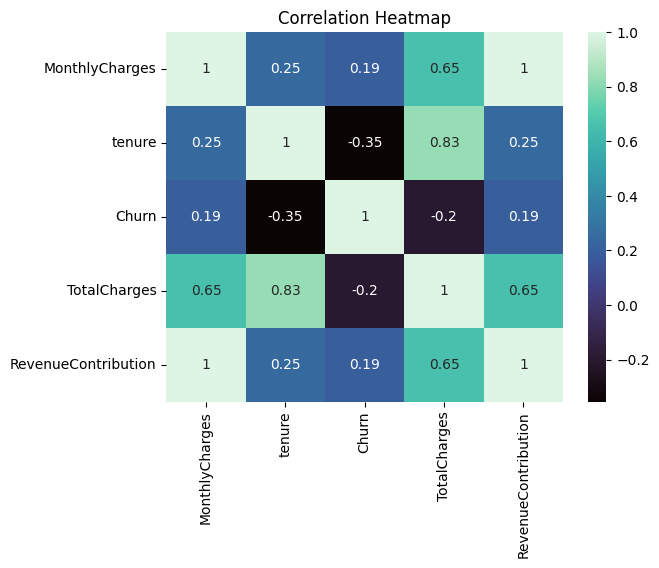

In [ ]:
# Heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()


Based on the correlation heatmap provided, here are the observations:

Observations:
**Monthly Charges:**

Positively correlated with Total Charges (0.65) and strongly with Revenue Contribution (1.0).
Weak positive correlation with Churn (0.19), suggesting that higher monthly charges may slightly increase churn likelihood.
**Tenure:**

Strong positive correlation with Total Charges (0.83), as customers with longer tenures tend to have higher total charges.
Moderate negative correlation with Churn (-0.35), indicating that longer-tenured customers are less likely to churn.
**Churn:**

Weak positive correlation with Monthly Charges (0.19), suggesting that higher charges may contribute to churn but are not the sole factor.
Weak negative correlation with Tenure (-0.35), implying that longer-tenured customers are less likely to churn.

**Total Charges:**

Strongly correlated with Tenure (0.83) and Monthly Charges (0.65), as expected from the formula used to calculate total charges.
Weak negative correlation with Churn (-0.2), suggesting customers with higher total charges(often more tenure) are slightly less likely to churn.

**Revenue Contribution:**

Weak correlation with Churn (0.19), indicating it is not strong driver of churn.

Insights:
Tenure and Total Charges are inversely related to churn, meaning retaining customers for longer periods could reduce churn rates.
Monthly Charges have a slight positive relationship with churn, suggesting that customers with higher charges might be more price-sensitive.
Strategies to retain customers could include reducing monthly charges or offering discounts to long-tenured customers to prevent churn.

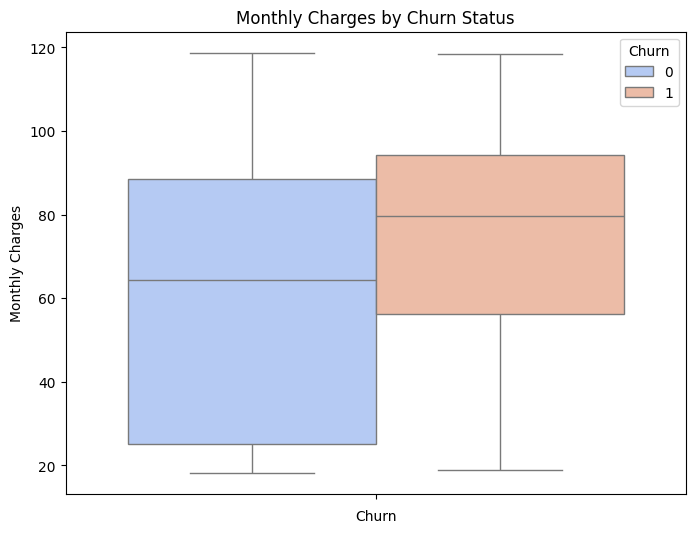

In [ ]:
#Box plot for MonthlyCharges by Churn status\
#To see further the relation between monthly charges and churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, hue='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [ ]:
# Calculate Q1 and Q3 for churned and non-churned customers
q1_non_churned = np.percentile(df[df['Churn'] == 0]['MonthlyCharges'], 25)
q3_non_churned = np.percentile(df[df['Churn'] == 0]['MonthlyCharges'], 75)
IQR_non_churned = q3_non_churned - q1_non_churned

q1_churned = np.percentile(df[df['Churn'] == 1]['MonthlyCharges'], 25)
q3_churned = np.percentile(df[df['Churn'] == 1]['MonthlyCharges'], 75)
IQR_churned = q3_churned - q1_churned

print("Non-Churned Q1:", q1_non_churned, "\nQ3:", q3_non_churned, "\nIQR:", IQR_non_churned)
print("Churned Q1:", q1_churned, "\nQ3:", q3_churned,"\nIQR:", IQR_churned )


Non-Churned Q1: 25.1 
Q3: 88.475 
IQR: 63.37499999999999
Churned Q1: 56.15 
Q3: 94.2 
IQR: 38.050000000000004


**Observations** **from the Box Plot**:

**Spread of Values:**

The blue boxplot (non-churned) spans a broader range, reflecting more variability in charges tolerated by non-churned customers.

The red boxplot (churned) has a narrower IQR, indicating less tolerance for variability in higher monthly charges.

**Median Placement:**

The median for churned customers is higher ($78) compared to non-churned customers  ($64). This suggests that customers paying higher monthly charges are more likely to churn.

**Overlap:**

The overlap in the boxplots indicates that there are customers within similar monthly charge ranges (e.g., $60 to $88) in both groups. However, the clustering above $78 for churned customers is more pronounced.

<ipython-input-27-93b357c381aa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_churn_rate_by_group = df.groupby('TenureGroup')['Churn'].mean() * 100  # Convert to percentage


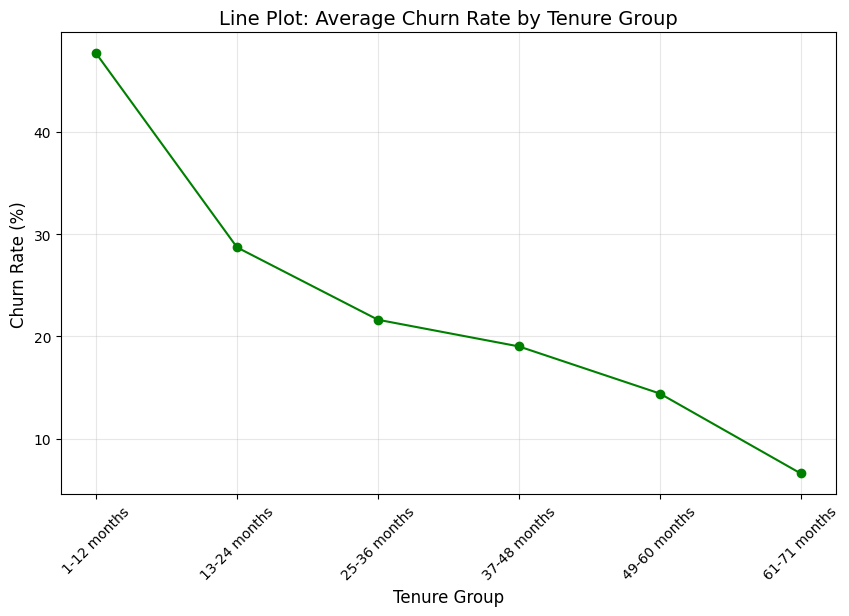

In [ ]:
# Group data by TenureGroup to calculate the average churn rate
average_churn_rate_by_group = df.groupby('TenureGroup')['Churn'].mean() * 100  # Convert to percentage

# Plot
plt.figure(figsize=(10, 6))
average_churn_rate_by_group.plot(kind='line', marker='o', color='green', linestyle='-')

# Add labels and title
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.title('Line Plot: Average Churn Rate by Tenure Group', fontsize=14)
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.grid(alpha=0.3)
plt.show()








Observations from the Line Plot: Average Churn Rate by Tenure


The line plot shows the average churn rate by tenure group, indicating a clear negative relationship between tenure and churn rate. Customers with shorter tenure (1–12 months) have the highest churn rate, exceeding 40%, while customers with longer tenure (61–71 months) exhibit the lowest churn rate, around 10%. This suggests that customer retention improves significantly as tenure increases, highlighting the importance of strategies to engage and retain new customers during their initial months with the company.

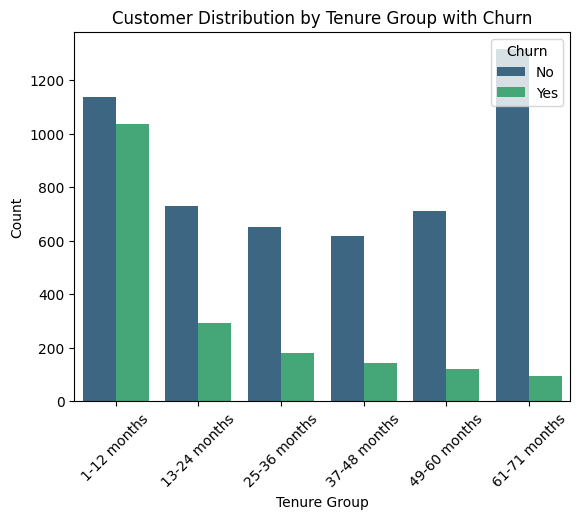

In [ ]:
sns.countplot(
    data=df,
    x='TenureGroup',
    hue='Churn',  # Add churn as a categorical split
    order=['1-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-71 months'],
    palette='viridis'
)
plt.title('Customer Distribution by Tenure Group with Churn')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])  # Adjust legend labels if necessary
plt.show()

key observations from the chart:
High Churn in the 1-12 Months Group:

The "1-12 months" tenure group has the highest count of churned customers compared to other tenure groups. This indicates that customers are more likely to churn during the early stages of their subscription. Churn Decreases with Longer Tenure:

As tenure increases, the proportion of churned customers decreases significantly. The groups "49-60 months" and "61-71 months" have very low churn, indicating strong customer retention among long-term subscribers. Large Customer Base in the 1-12 Months Group:

The "1-12 months" group also has the largest total number of customers (both churned and non-churned). This suggests that many customers are new and either churn quickly or continue into longer-tenure groups. Stability in Long-Term Customers:

The "61-71 months" group has the highest number of retained customers, with minimal churn. This highlights the loyalty of long-term subscribers and the potential impact of retention strategies. Middle Tenure Groups (13-48 months):

The churn rate is relatively moderate in these groups, indicating a transition phase where customers are less likely to churn but not as loyal as long-term subscribers.

Recommendations:
Focus retention efforts on the "1-12 months" group to reduce early-stage churn.
Investigate factors contributing to high loyalty in the "61-71 months" group and apply similar strategies to shorter-tenure customers.
Consider targeted offers or engagement campaigns for the "13-48 months" groups to strengthen their retention.

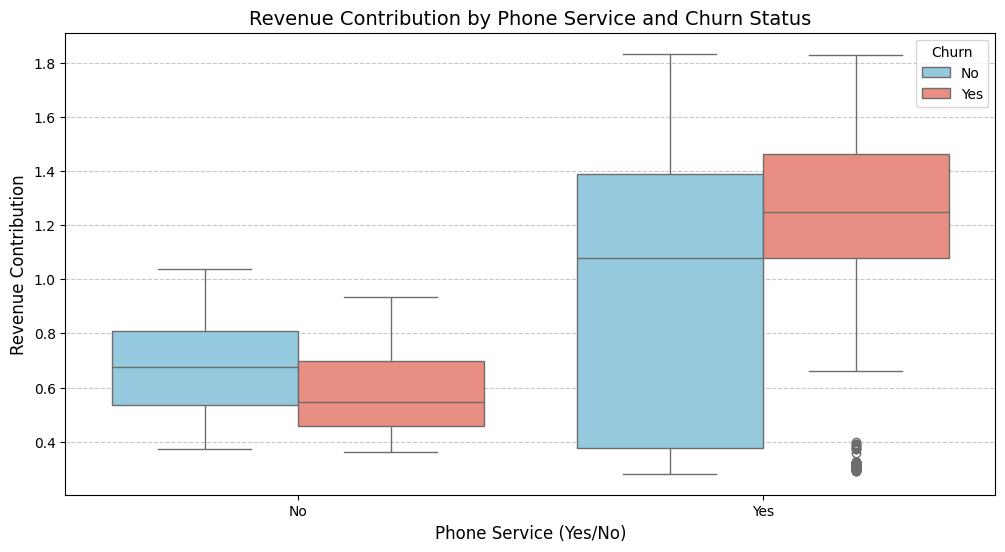

In [ ]:
# Boxplot for Revenue Contribution by phone service and Churn Status
# Ensure Churn is mapped to Yes/No for better readability
df['Churn_Label'] = df['Churn'].replace({1: 'Yes', 0: 'No'})
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='PhoneService',
    y='RevenueContribution',
    hue='Churn_Label',  # Use Churn_Label for Yes/No representation
    palette={'No': 'skyblue', 'Yes': 'salmon'}  # Custom colors for churn
)

# Add titles and labels
plt.title('Revenue Contribution by Phone Service and Churn Status', fontsize=14)
plt.xlabel('Phone Service (Yes/No)', fontsize=12)
plt.ylabel('Revenue Contribution', fontsize=12)
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





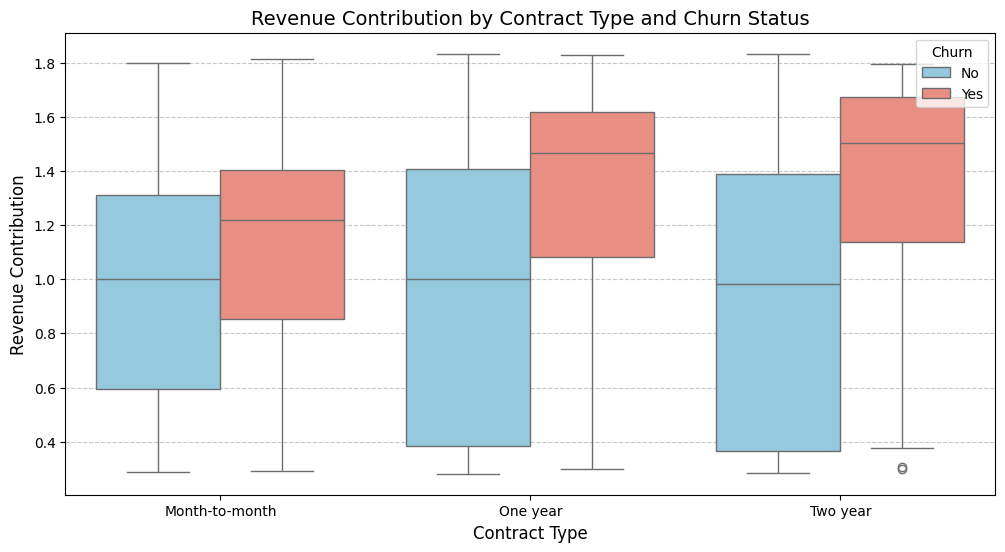

In [ ]:
# Boxplot for Revenue Contribution by Contract Type and Churn Status

df['Churn_Label'] = df['Churn'].replace({1: 'Yes', 0: 'No'})
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Contract',
    y='RevenueContribution',
    hue='Churn_Label',  # Use Churn_Label for Yes/No representation
    palette={'No': 'skyblue', 'Yes': 'salmon'}
)


plt.title('Revenue Contribution by Contract Type and Churn Status', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Revenue Contribution', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


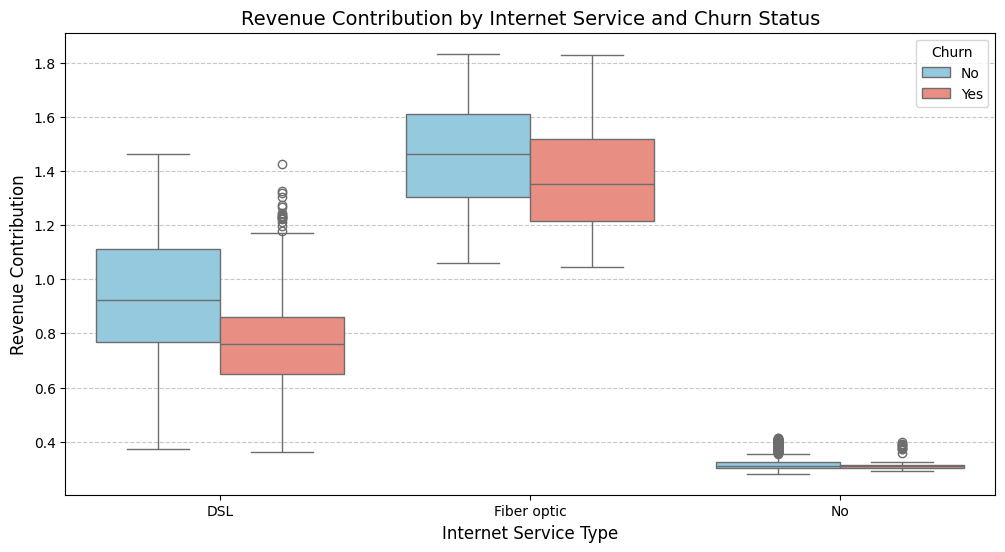

In [ ]:
# Boxplot for Revenue Contribution by Contract Type and Churn Status
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='InternetService',
    y='RevenueContribution',
    hue='Churn_Label',  # Use Churn_Label for Yes/No representation
    palette={'No': 'skyblue', 'Yes': 'salmon'}  # Custom colors for churn
)

# Add titles and labels
plt.title('Revenue Contribution by Internet Service and Churn Status', fontsize=14)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Revenue Contribution', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Observations:
**1. Revenue Contribution by Phone Service and Churn Status:**

**No Phone Service:**

Customers with no phone service show lower revenue contribution, regardless of churn status.
Churned customers contribute slightly less revenue compared to non-churned customers.

**With Phone Service:**

Customers with phone service show a higher revenue contribution.
Churned customers contribute more revenue than non-churned customers, indicating that higher revenue customers might be more prone to churn.

**2. Revenue Contribution by Contract Type and Churn Status:**

**Month-to-Month: **
The revenue contribution is relatively higher for churned customers compared to non-churned ones.
Month-to-month contracts are associated with more variability, likely due to a lack of long-term commitment.

**One-Year and Two-Year Contracts:**
Churned customers still contribute more revenue on average than non-churned customers.
Longer contracts generally show more stability in revenue contribution for non-churned customers, indicating customer retention strategies may be effective here.

3. Revenue Contribution by Internet Service and Churn Status:


Fiber Optic :

Churned customers contribute less revenue than non-churned customers, while churned customers show more stability in their revenue.


DSL:

 DSL customers contribute less revenue than fiber optic customers, and churned DSL customers contribute less revenue than non-churned DSL customers.

No Internet Service:


Revenue contribution is minimal, and differences between churned and non-churned customers are negligible.


**Insights:**
High Revenue Customers Are at Risk:

Across all categories, churned customers often have higher revenue contributions, highlighting the need for targeted retention efforts for high-revenue customers.

Impact of Service Types:

Fiber optic and phone services are associated with higher revenue contributions but high churn rate among users who lower Revenue. This indicates a potential dissatisfaction among these segments.

Contract Type Stability:

Long-term contracts (one year or two years) reduce variability in revenue contributions and are associated with lower churn rates compared to month-to-month contracts.

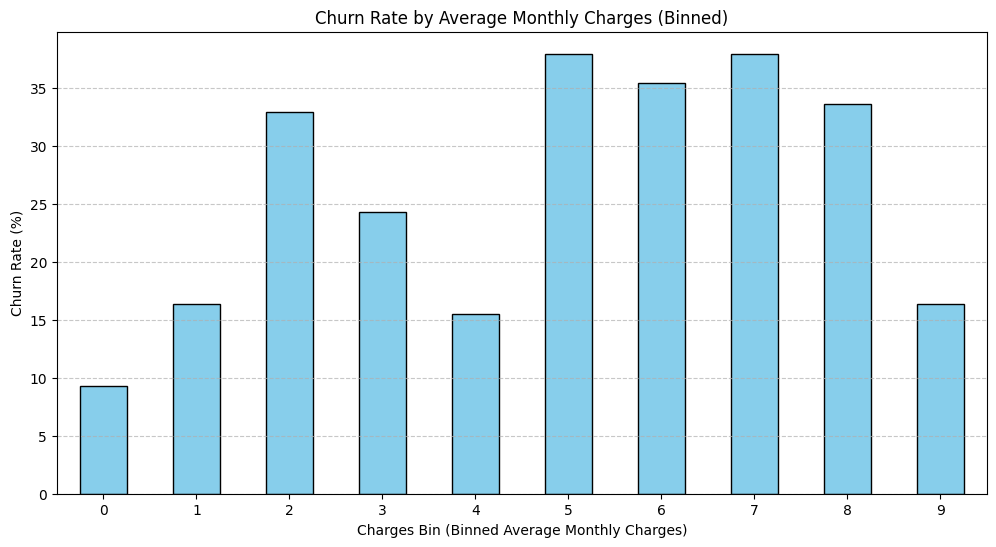

In [ ]:
# 4. Churn Probability Based on Average Monthly Charges (Binned)
df['ChargesBin'] = pd.cut(df['AverageMonthlyCharges'], bins=10, labels=False)
churn_rate = df.groupby('ChargesBin')['Churn'].mean() * 100
plt.figure(figsize=(12, 6))
churn_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Churn Rate by Average Monthly Charges (Binned)')
plt.xlabel('Charges Bin (Binned Average Monthly Charges)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations from the Bar Chart: Churn Rate by Average Monthly Charges (Binned)
Churn Peaks in Mid-Charge Range:

The highest churn rates are observed in the bins representing moderate average monthly charges (bins 5, 6, and 7).
Customers paying moderately higher charges are more likely to churn.
Low Churn at Extremes:

Customers in the lowest charge range (bin 0) have the lowest churn rates, suggesting they are likely more price-sensitive and satisfied with lower costs.
Similarly, churn rates are relatively lower in the highest charge range (bin 9), potentially due to value-added services or loyalty among high-paying customers.
Fluctuating Churn Rates:

The churn rate fluctuates across bins, indicating that factors other than monthly charges alone might influence churn behavior.
Insights:
Moderate-Paying Customers:

Customers in the moderate charge range may feel they are not receiving enough value for the price they pay. Retention strategies such as offering additional benefits or discounts to this segment could help reduce churn.
Low-Paying Customers:

Customers in the lower charge range are more stable, potentially due to limited expectations or affordability.
High-Paying Customers:

Retaining high-paying customers could involve ensuring the continued quality of services or loyalty rewards, as this group has relatively lower churn rates.

In [ ]:
#Clean and Prepare the Data
# Replace "no internet service" with "No" for uniformity
columns_to_clean = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df[columns_to_clean] = df[columns_to_clean].replace('no internet service', 'No')
#Analyze the Data
# 1. Churn Rate by Each Service
#Calculate churn rates for customers who use each service versus those who don't.
service_churn = {}
for col in columns_to_clean:
    service_churn[col] = df.groupby(col)['Churn'].mean() * 100  # Churn rate in percentage

# Convert to a DataFrame for easier analysis
service_churn_df = pd.DataFrame(service_churn)
print(service_churn_df)
#2. Service Usage Distribution
# Calculate the proportion of customers using each service.
service_usage = df[columns_to_clean].apply(pd.Series.value_counts, normalize=True).T
print(service_usage)

                     OnlineSecurity  OnlineBackup  DeviceProtection  \
No                        41.778667     39.941691         39.140271   
No internet service        7.434211      7.434211          7.434211   
Yes                       14.640199     21.567010         22.539289   

                     TechSupport  StreamingTV  StreamingMovies  
No                     41.647465    33.535066        33.728875  
No internet service     7.434211     7.434211         7.434211  
Yes                    15.196078    30.114687        29.952398  
                        No       Yes  No internet service
OnlineSecurity    0.497298  0.286547             0.216155
OnlineBackup      0.438993  0.344852             0.216155
DeviceProtection  0.439989  0.343857             0.216155
TechSupport       0.493743  0.290102             0.216155
StreamingTV       0.399460  0.384386             0.216155
StreamingMovies   0.395478  0.388367             0.216155


<ipython-input-33-17668e4610a7>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_churn[col] = df.groupby(col)['Churn'].mean() * 100  # Churn rate in percentage


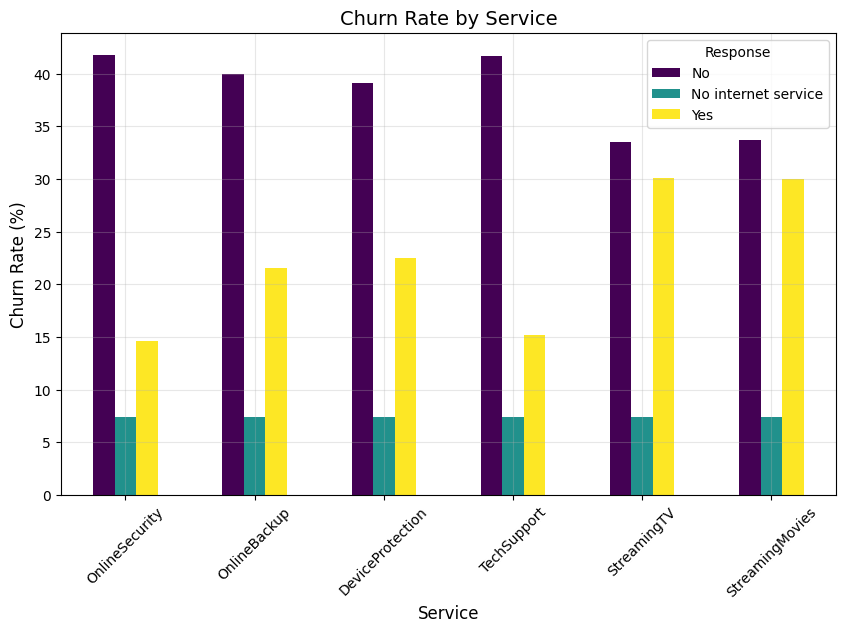

In [ ]:
#Step 3: Visualize the Data
#1. Bar Plot: Churn Rate by Service
#Visualize the churn rates for each service using a bar plot.
service_churn_df.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Churn Rate by Service', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Service', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')
plt.grid(alpha=0.3)
plt.show()

Observations from the Bar Chart: Churn Rate by Service

**Services with No Subscription:**

Customers who do not subscribe to services like Online Security, Online Backup, Device Protection, or Tech Support have significantly higher churn rates (around 40%).
This indicates that the lack of these additional services might be linked to higher dissatisfaction or less engagement with the provider.
Customers with Internet Service:

Customers who have these services (Yes) show a moderate churn rate, typically between 20-25%, suggesting that adding these services reduces churn but does not eliminate it completely.
No Internet Service:

Customers with No Internet Service have the lowest churn rates, which could indicate that they are part of a less volatile or a different customer segment.

**Streaming Services (TV and Movies):**

The churn pattern for streaming services (StreamingTV and StreamingMovies) is similar to other services. Customers who do not subscribe to these services also exhibit higher churn rates.


**Key Insights:**
Value of Add-On Services:

Customers without add-on services (like Online Security, Backup, or Tech Support) are more likely to churn. Promoting these services or bundling them with other plans could reduce churn.
Target Non-Subscribers:

The company could focus on converting non-subscribers to subscribers by highlighting the benefits of these services to reduce churn.

**Stable "No Internet" Customers:**

Customers with no internet service have lower churn rates, which might indicate they belong to a niche, less price-sensitive segment.